***VR DATA**

To find column names of vr info

In [9]:
import pandas as pd

# Load the data
vr_data = pd.read_excel('vr info.xlsx')

# Print the column names
print(vr_data.columns)


Index(['Unnamed: 0', 'T', 'Camera (eye) [ow]', 'Camera (eye) [ox]',
       'Camera (eye) [oy]', 'Camera (eye) [oz]', 'Camera (eye) [x]',
       'Camera (eye) [y]', 'Camera (eye) [z]', 'Tracker_01 [ow]',
       'Tracker_01 [ox]', 'Tracker_01 [oy]', 'Tracker_01 [oz]',
       'Tracker_01 [x]', 'Tracker_01 [y]', 'Tracker_01 [z]', 'Tracker_02 [ow]',
       'Tracker_02 [ox]', 'Tracker_02 [oy]', 'Tracker_02 [oz]',
       'Tracker_02 [x]', 'Tracker_02 [y]', 'Tracker_02 [z]', 'Tracker_03 [ow]',
       'Tracker_03 [ox]', 'Tracker_03 [oy]', 'Tracker_03 [oz]',
       'Tracker_03 [x]', 'Tracker_03 [y]', 'Tracker_03 [z]', 'Tracker_04 [ow]',
       'Tracker_04 [ox]', 'Tracker_04 [oy]', 'Tracker_04 [oz]',
       'Tracker_04 [x]', 'Tracker_04 [y]', 'Tracker_04 [z]', 'Tracker_05 [ow]',
       'Tracker_05 [ox]', 'Tracker_05 [oy]', 'Tracker_05 [oz]',
       'Tracker_05 [x]', 'Tracker_05 [y]', 'Tracker_05 [z]', 'Tracker_06 [ow]',
       'Tracker_06 [ox]', 'Tracker_06 [oy]', 'Tracker_06 [oz]',
       'Track

Finds out where the trackers are placed based on the vr file data (Either shoulders, hip, or feet)
***Accurate***

In [10]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the data
vr_data = pd.read_excel('vr info.xlsx')

# Extract relevant columns
trackers = vr_data[['Tracker_01 [z]', 'Tracker_02 [z]', 'Tracker_03 [z]', 'Tracker_04 [z]', 'Tracker_05 [z]', 'Tracker_06 [z]', 'Tracker_07 [z]']]

# Use KMeans clustering to identify groups of trackers
kmeans = KMeans(n_clusters=3) # Shoulders, hips, or feet
tracker_labels = kmeans.fit_predict(trackers.T)

# Map the clusters to body parts (e.g., highest mean Z is shoulders, lowest is feet)
cluster_means = kmeans.cluster_centers_.mean(axis=1)
sorted_clusters = np.argsort(cluster_means)

# Assign labels based on sorted clusters
label_map = {sorted_clusters[0]: 'feet', sorted_clusters[1]: 'hips', sorted_clusters[2]: 'shoulders'}
tracker_positions = [label_map[label] for label in tracker_labels]

# Print or use the labeled tracker positions
for i, pos in enumerate(tracker_positions):
    print(f'Tracker_{i+1} is placed on: {pos}')



Tracker_1 is placed on: shoulders
Tracker_2 is placed on: hips
Tracker_3 is placed on: shoulders
Tracker_4 is placed on: feet
Tracker_5 is placed on: feet
Tracker_6 is placed on: hips
Tracker_7 is placed on: hips


Finds out where the trackers are placed based on the vr file data specifically on each level (Ex:right or left foot)
***Have not tested accuracy yet***

In [14]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Load the data
vr_data = pd.read_excel('vr info.xlsx')

# Extract relevant columns for Z-coordinates
z_trackers = vr_data[['Tracker_01 [z]', 'Tracker_02 [z]', 'Tracker_03 [z]', 'Tracker_04 [z]', 'Tracker_05 [z]', 'Tracker_06 [z]', 'Tracker_07 [z]']]

# Use KMeans clustering to identify groups of trackers (shoulders, hips, or feet)
kmeans = KMeans(n_clusters=3, random_state=0)  # Ensure reproducibility with random_state
tracker_labels = kmeans.fit_predict(z_trackers.T)

# Map the clusters to body parts (e.g., highest mean Z is shoulders, lowest is feet)
cluster_means = kmeans.cluster_centers_.mean(axis=1)
sorted_clusters = np.argsort(cluster_means)

# Assign level labels based on sorted clusters
level_map = {sorted_clusters[0]: 'feet', sorted_clusters[1]: 'hips', sorted_clusters[2]: 'shoulders'}
tracker_levels = [level_map[label] for label in tracker_labels]

# Extract relevant columns for X and Y coordinates
x_trackers = vr_data[['Tracker_01 [x]', 'Tracker_02 [x]', 'Tracker_03 [x]', 'Tracker_04 [x]', 'Tracker_05 [x]', 'Tracker_06 [x]', 'Tracker_07 [x]']]
y_trackers = vr_data[['Tracker_01 [y]', 'Tracker_02 [y]', 'Tracker_03 [y]', 'Tracker_04 [y]', 'Tracker_05 [y]', 'Tracker_06 [y]', 'Tracker_07 [y]']]

# Function to assign specific positions within each level
def assign_specific_positions(level, indices, x_values, y_values):
    if level == 'hips':  # Hips have three positions: left, middle, right
        position_labels = ['left', 'middle', 'right']
    else:  # Shoulders and feet have two positions: left and right
        position_labels = ['left', 'right']
    
    # Calculate the mean X value for each tracker
    mean_x = [np.mean(x_values[idx]) for idx in indices]
    
    # Sort the indices based on the mean X values
    sorted_indices = [x for _, x in sorted(zip(mean_x, indices))]
    
    # Assign positions based on sorted indices
    assigned_positions = {}
    for pos, idx in zip(position_labels, sorted_indices):
        assigned_positions[idx] = f"{level} ({pos})"
    
    return assigned_positions

# Initialize list to store final positions
final_positions = [''] * len(tracker_levels)

# Assign specific positions for each level
for level in ['feet', 'hips', 'shoulders']:
    indices = [i for i, lvl in enumerate(tracker_levels) if lvl == level]
    if indices:  # Check if there are any trackers for this level
        x_values = x_trackers.values.T  # Transpose to get each tracker's x-values
        y_values = y_trackers.values.T  # Transpose to get each tracker's y-values
        assigned_positions = assign_specific_positions(level, indices, x_values, y_values)
        for idx, pos in assigned_positions.items():
            final_positions[idx] = pos

# Print the final labeled tracker positions
for i, pos in enumerate(final_positions):
    print(f'Tracker_{i+1} is placed on: {pos}')


Tracker_1 is placed on: shoulders (right)
Tracker_2 is placed on: hips (left)
Tracker_3 is placed on: shoulders (left)
Tracker_4 is placed on: feet (left)
Tracker_5 is placed on: feet (right)
Tracker_6 is placed on: hips (right)
Tracker_7 is placed on: hips (middle)


In [16]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Load the data
vr_data = pd.read_excel('vr info.xlsx')

# Extract relevant columns for Z-coordinates
z_trackers = vr_data[['Tracker_01 [z]', 'Tracker_02 [z]', 'Tracker_03 [z]', 'Tracker_04 [z]', 'Tracker_05 [z]', 'Tracker_06 [z]', 'Tracker_07 [z]']]

# Use KMeans clustering to identify groups of trackers (shoulders, hips, or feet)
kmeans = KMeans(n_clusters=3, random_state=0)  # Ensure reproducibility with random_state
tracker_labels = kmeans.fit_predict(z_trackers.T)

# Map the clusters to body parts (e.g., highest mean Z is shoulders, lowest is feet)
cluster_means = kmeans.cluster_centers_.mean(axis=1)
sorted_clusters = np.argsort(cluster_means)

# Assign level labels based on sorted clusters
level_map = {sorted_clusters[0]: 'feet', sorted_clusters[1]: 'hips', sorted_clusters[2]: 'shoulders'}
tracker_levels = [level_map[label] for label in tracker_labels]

# Extract relevant columns for X and Y coordinates
x_trackers = vr_data[['Tracker_01 [x]', 'Tracker_02 [x]', 'Tracker_03 [x]', 'Tracker_04 [x]', 'Tracker_05 [x]', 'Tracker_06 [x]', 'Tracker_07 [x]']]
y_trackers = vr_data[['Tracker_01 [y]', 'Tracker_02 [y]', 'Tracker_03 [y]', 'Tracker_04 [y]', 'Tracker_05 [y]', 'Tracker_06 [y]', 'Tracker_07 [y]']]

# Function to assign specific positions within each level
def assign_specific_positions(level, indices, x_values):
    if level == 'hips':  # Hips have three positions: left, middle, right
        position_labels = ['left', 'middle', 'right']
    else:  # Shoulders and feet have two positions: left and right
        position_labels = ['left', 'right']
    
    # Calculate the mean X value for each tracker
    mean_x = [np.mean(x_values[:, idx]) for idx in indices]
    
    # Sort the indices based on the mean X values
    sorted_indices = [x for _, x in sorted(zip(mean_x, indices))]
    
    # Assign positions based on sorted indices
    assigned_positions = {}
    for pos, idx in zip(position_labels, sorted_indices):
        assigned_positions[idx] = f"{level} ({pos})"
    
    return assigned_positions

# Initialize list to store final positions
final_positions = [''] * len(tracker_levels)

# Assign specific positions for each level
for level in ['feet', 'hips', 'shoulders']:
    indices = [i for i, lvl in enumerate(tracker_levels) if lvl == level]
    if indices:  # Check if there are any trackers for this level
        x_values = x_trackers.values.T  # Transpose to get each tracker's x-values
        assigned_positions = assign_specific_positions(level, indices, x_values)
        for idx, pos in assigned_positions.items():
            final_positions[idx] = pos

# Print the final labeled tracker positions
for i, pos in enumerate(final_positions):
    print(f'Tracker_{i+1} is placed on: {pos}')


Tracker_1 is placed on: shoulders (left)
Tracker_2 is placed on: hips (right)
Tracker_3 is placed on: shoulders (right)
Tracker_4 is placed on: feet (left)
Tracker_5 is placed on: feet (right)
Tracker_6 is placed on: hips (left)
Tracker_7 is placed on: hips (middle)


Not sure what this code below is doing tbh...

In [34]:
def assign_specific_positions(level, indices, x_values, y_values):
    # Print raw data for debugging
    print(f"Level: {level}")
    print(f"Indices: {indices}")
    
    # Ensure indices are valid
    if not all(i < len(x_values) for i in indices):
        raise ValueError(f"Some indices are out of range for x_values.")
    
    # Calculate the mean X and Y value for each tracker
    mean_x = [np.mean(x_values[idx]) for idx in indices]
    mean_y = [np.mean(y_values[idx]) for idx in indices]
    
    print(f"Mean X: {mean_x}")
    print(f"Mean Y: {mean_y}")
    
    # Check lengths
    if len(mean_y) != len(indices):
        raise ValueError(f"Mismatch in lengths: Mean Y length {len(mean_y)} != Indices length {len(indices)}")
    
    # Sort the indices based on the mean X values
    sorted_indices = [x for _, x in sorted(zip(mean_x, indices))]
    print(f"Sorted Indices: {sorted_indices}")
    
    # Check for sufficient number of indices
    if level == 'hips':
        if len(sorted_indices) != 3:
            raise ValueError(f"Expected 3 indices for hips level but got: {len(sorted_indices)}")
        
        left_idx, middle_idx, right_idx = sorted_indices
        print(f"Initial Indices for Hips: left_idx={left_idx}, middle_idx={middle_idx}, right_idx={right_idx}")
        
        # Order by Y values for tie-breaking
        if len(mean_y) > max(sorted_indices):
            try:
                if mean_y[left_idx] > mean_y[right_idx]:
                    if mean_y[middle_idx] > mean_y[left_idx]:
                        left_idx, middle_idx, right_idx = right_idx, left_idx, middle_idx
                    else:
                        left_idx, middle_idx, right_idx = right_idx, middle_idx, left_idx
                else:
                    if mean_y[middle_idx] > mean_y[right_idx]:
                        left_idx, middle_idx, right_idx = middle_idx, right_idx, left_idx
                    else:
                        left_idx, middle_idx, right_idx = left_idx, right_idx, middle_idx
                
                assigned_positions = {
                    left_idx: f"{level} (left)",
                    middle_idx: f"{level} (middle)",
                    right_idx: f"{level} (right)"
                }
            except IndexError:
                print(f"IndexError - Mean Y values: {mean_y}, Sorted Indices: {sorted_indices}")
                raise
        else:
            raise IndexError("Mean Y index is out of range.")
    
    else:  # For shoulders and feet
        if len(sorted_indices) != 2:
            raise ValueError(f"Expected 2 indices for {level} level but got: {len(sorted_indices)}")
        
        left_idx, right_idx = sorted_indices
        print(f"Indices for Shoulders/Feet: left_idx={left_idx}, right_idx={right_idx}")
        
        assigned_positions = {
            left_idx: f"{level} (left)",
            right_idx: f"{level} (right)"
        }
    
    return assigned_positions

# Example call to the function for debugging
x_values = x_trackers.values.T  # Transpose to get each tracker's x-values
y_values = y_trackers.values.T  # Transpose to get each tracker's y-values

for level in ['feet', 'hips', 'shoulders']:
    indices = [i for i, lvl in enumerate(tracker_levels) if lvl == level]
    if indices:  # Check if there are any trackers for this level
        try:
            assigned_positions = assign_specific_positions(level, indices, x_values, y_values)
            for idx, pos in assigned_positions.items():
                final_positions[idx] = pos
        except Exception as e:
            print(f"Error processing level {level}: {e}")

# Print the final labeled tracker positions
for i, pos in enumerate(final_positions):
    print(f'Tracker_{i+1} is placed on: {pos}')


Level: feet
Indices: [3, 4]
Mean X: [np.float64(-2.00379191692439), np.float64(-1.9858111663667393)]
Mean Y: [np.float64(0.4821582905275848), np.float64(0.4021185465757095)]
Sorted Indices: [3, 4]
Indices for Shoulders/Feet: left_idx=3, right_idx=4
Level: hips
Indices: [1, 5, 6]
Mean X: [np.float64(-1.9786820727468744), np.float64(-1.9551216357887478), np.float64(-1.9627625210336377)]
Mean Y: [np.float64(0.4668891509610042), np.float64(0.46418624541813847), np.float64(0.41750292382218696)]
Sorted Indices: [1, 6, 5]
Initial Indices for Hips: left_idx=1, middle_idx=6, right_idx=5
Error processing level hips: Mean Y index is out of range.
Level: shoulders
Indices: [0, 2]
Mean X: [np.float64(-1.9776613312009328), np.float64(-1.9977697188895613)]
Mean Y: [np.float64(0.4173417055157769), np.float64(0.45450618331137127)]
Sorted Indices: [2, 0]
Indices for Shoulders/Feet: left_idx=2, right_idx=0
Tracker_1 is placed on: shoulders (right)
Tracker_2 is placed on: 
Tracker_3 is placed on: shoulder

Trackers columns (VR data)

In [12]:
# Load the data
vr_data = pd.read_excel('vr info.xlsx')

# Extract and print the column names
trackers = vr_data[['Tracker_01 [x]', 'Tracker_01 [y]', 'Tracker_01 [z]', 
                    'Tracker_02 [x]', 'Tracker_02 [y]', 'Tracker_02 [z]', 
                    'Tracker_03 [x]', 'Tracker_03 [y]', 'Tracker_03 [z]', 
                    'Tracker_04 [x]', 'Tracker_04 [y]', 'Tracker_04 [z]', 
                    'Tracker_05 [x]', 'Tracker_05 [y]', 'Tracker_05 [z]', 
                    'Tracker_06 [x]', 'Tracker_06 [y]', 'Tracker_06 [z]', 
                    'Tracker_07 [x]', 'Tracker_07 [y]', 'Tracker_07 [z]']]

print(trackers.columns)


Index(['Tracker_01 [x]', 'Tracker_01 [y]', 'Tracker_01 [z]', 'Tracker_02 [x]',
       'Tracker_02 [y]', 'Tracker_02 [z]', 'Tracker_03 [x]', 'Tracker_03 [y]',
       'Tracker_03 [z]', 'Tracker_04 [x]', 'Tracker_04 [y]', 'Tracker_04 [z]',
       'Tracker_05 [x]', 'Tracker_05 [y]', 'Tracker_05 [z]', 'Tracker_06 [x]',
       'Tracker_06 [y]', 'Tracker_06 [z]', 'Tracker_07 [x]', 'Tracker_07 [y]',
       'Tracker_07 [z]'],
      dtype='object')


Trying to get plot only when sync = 1 in VR info (multiple trackers)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
vr_data = pd.read_excel('vr info.xlsx')

# Filter data where Sync == 1
filtered_vr_data = vr_data[vr_data['Sync'] == 1]

# Extract relevant columns
trackers = filtered_vr_data[['T', 'Tracker_01 [z]', 'Tracker_02 [z]', 'Tracker_03 [z]', 'Tracker_04 [z]', 'Tracker_05 [z]', 'Tracker_06 [z]', 'Tracker_07 [z]']]

# Plot the data
plt.figure(figsize=(10, 6))
for column in trackers.columns[1:]:  # Skip the 'T' column
    plt.plot(trackers['T'], trackers[column], label=column)

plt.xlabel('Time')
plt.ylabel('Z-Coordinate')
plt.legend()
plt.title('VR Tracker Data when Sync = 1')
plt.show()


Checking if the filtered data only includes data when sync = 1, which it does

In [ ]:
print(filtered_vr_data.head())  # Display the first few rows of filtered data

Keeping track of only Z-coordinate (height displacement) of only tracker 4 (unsynced time)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
vr_data = pd.read_excel('vr info.xlsx')

# Filter data where Sync == 1
filtered_vr_data = vr_data[vr_data['Sync'] == 1]

# Extract relevant columns
trackers = filtered_vr_data[['T', 'Tracker_04 [z]']]

# Plot the data for Tracker 4
plt.figure(figsize=(10, 6))
plt.plot(trackers['T'], trackers['Tracker_04 [z]'], label='Tracker 4 [z]', color='g')

plt.xlabel('Time')
plt.ylabel('Z-Coordinate')
plt.legend()
plt.title('Z-Coordinate of Tracker 4 when Sync = 1')
plt.grid(True)
plt.show()


Keeping track of only Z-coordinate (height displacement) of tracker 4, now with time synced to 0

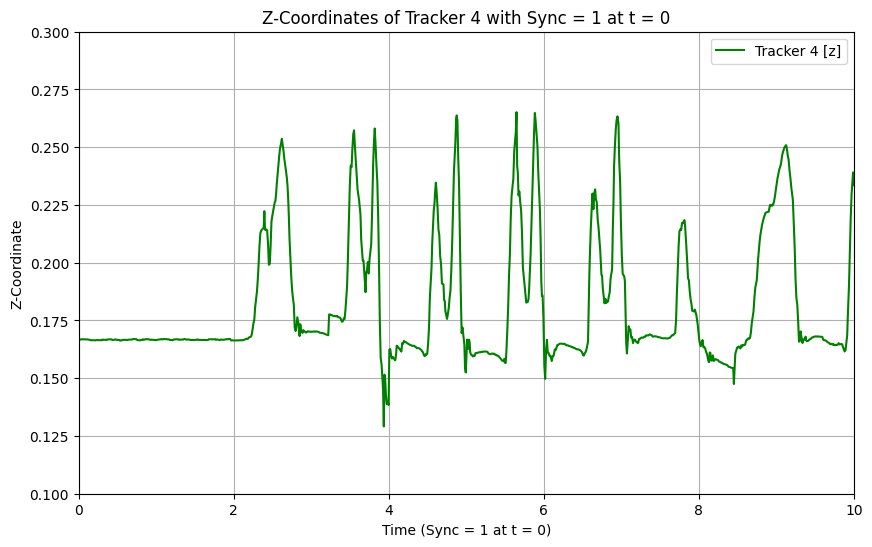

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
vr_data = pd.read_excel('vr info.xlsx')

# Filter data where Sync == 1
filtered_vr_data = vr_data[vr_data['Sync'] == 1].copy()  # Use .copy() to avoid chained indexing warning

# Find the first occurrence of Sync = 1
first_sync_time = filtered_vr_data['T'].min()

# Adjust time (T) relative to the first Sync = 1 occurrence
filtered_vr_data.loc[:, 'T_adjusted'] = filtered_vr_data['T'] - first_sync_time  # Use .loc to set values
#print(first_sync_time)

# Extract relevant columns
trackers = filtered_vr_data[['T_adjusted', 'Tracker_04 [z]']]  # Extracting Tracker 4

# Plot the data for Tracker 4
plt.figure(figsize=(10, 6))

plt.plot(trackers['T_adjusted'], trackers['Tracker_04 [z]'], label='Tracker 4 [z]', color='g')

plt.xlabel('Time (Sync = 1 at t = 0)')
plt.ylabel('Z-Coordinate')
plt.legend()
plt.title('Z-Coordinates of Tracker 4 with Sync = 1 at t = 0')
plt.grid(True)

# Zoom into the specified time interval
plt.xlim(0, 10)

# Zoom into the specified z interval
plt.ylim(0.1, 0.3)

plt.show()

# Find max and min values
max_value = trackers['Tracker_04 [z]'].max()
min_value = trackers['Tracker_04 [z]'].min()

# Find times corresponding to max and min values
time_at_max = trackers.loc[trackers['Tracker_04 [z]'].idxmax(), 'T_adjusted']
time_at_min = trackers.loc[trackers['Tracker_04 [z]'].idxmin(), 'T_adjusted']

#print(f"Maximum Z-Coordinate value: {max_value} at time {time_at_max}")
#print(f"Minimum Z-Coordinate value: {min_value} at time {time_at_min}")


***MAT DATA***

To find column names of MAT data

In [ ]:
import pandas as pd

# Load the data
mat_data = pd.read_excel('MAT EXAMPLE (1).xlsx')

# Print the column names
print(mat_data.columns)

Plots HS and TO times and samples from MAT data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the data skipping the first 21 rows to get to the relevant data
mat_data = pd.read_excel('MAT EXAMPLE (1).xlsx', skiprows=20)

# Step 2: Filter relevant columns based on their positions (columns 0-3)
filtered_mat_data = mat_data.iloc[:, :4].copy()
filtered_mat_data.columns = ['Sample #s', 'Left or Right', 'First Contact (HS)', 'Second Contact (TO)']

# Step 3: Print the first few rows to ensure data is loaded correctly
print("Initial data:")
print(filtered_mat_data.head())

# Step 4: Filter data to include only the right foot steps
right_foot_data = filtered_mat_data[filtered_mat_data['Left or Right'].str.contains('Right')]

# Step 5: Print the filtered data to ensure correct filtering
print("\nFiltered data for right foot:")
print(right_foot_data.head())

# Step 6: Plot HS and TO data for the right foot
plt.figure(figsize=(10, 6))

# Plot Heel Strikes (HS) and Toe Offs (TO) against time (Sample #s) for the right foot
plt.scatter(right_foot_data['First Contact (HS)'], right_foot_data['Sample #s'],
            color='orange', label='Heel Strike (HS)')
plt.scatter(right_foot_data['Second Contact (TO)'], right_foot_data['Sample #s'],
            color='green', label='Toe Off (TO)')

# Annotate each point with the exact time value
for i, row in right_foot_data.iterrows():
    plt.annotate(f"{row['First Contact (HS)']:.2f}", (row['First Contact (HS)'], row['Sample #s']), textcoords="offset points", xytext=(0,10), ha='center', color='orange')
    plt.annotate(f"{row['Second Contact (TO)']:.2f}", (row['Second Contact (TO)'], row['Sample #s']), textcoords="offset points", xytext=(0,10), ha='center', color='green')

plt.xlabel('Time (seconds)')
plt.ylabel('Sample #s')
plt.title('Heel Strikes and Toe Offs for Right Foot')
plt.legend()
plt.grid(True)

# Set axis limits to ensure all data points are visible
plt.xlim(0, 10) #max(right_foot_data['Second Contact (TO)']) + 1)
plt.ylim(0, 10) #max(right_foot_data['Sample #s']) + 1)

plt.show()


Attempt to plot HS and TO points from MAT and VR info data

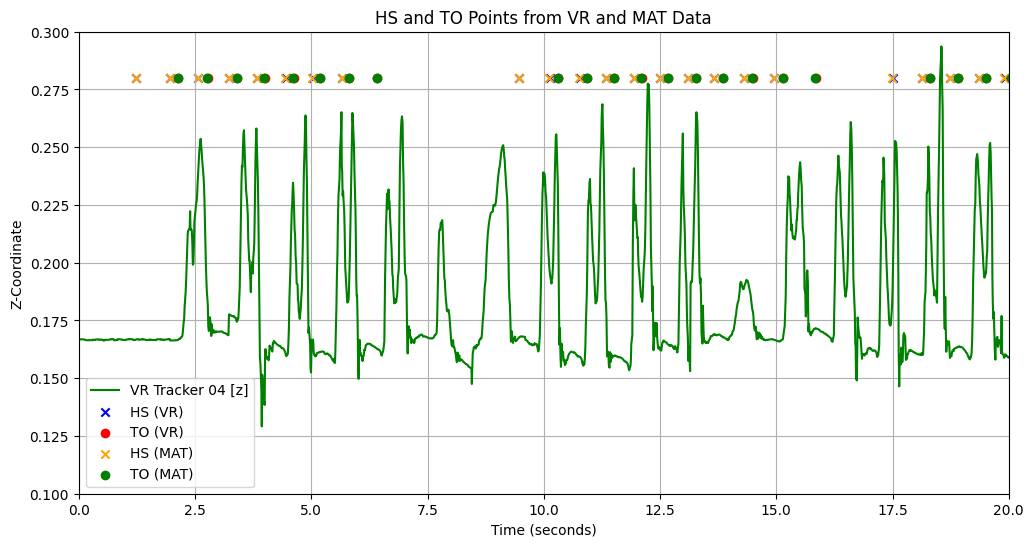

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load VR data
vr_data = pd.read_excel('vr info.xlsx')

# Load MAT data
mat_data = pd.read_excel('MAT EXAMPLE (1).xlsx', skiprows=20)

# Filter data where Sync == 1
filtered_vr_data = vr_data[vr_data['Sync'] == 1].copy()

# Find the first occurrence of Sync = 1
first_sync_time = filtered_vr_data['T'].min()
#print(first_sync_time)

# Adjust time (T) relative to the first Sync = 1 occurrence
filtered_vr_data['T_adjusted'] = filtered_vr_data['T'] - first_sync_time

# Extract relevant columns for Tracker 04
trackers = filtered_vr_data[['T_adjusted', 'Tracker_04 [z]']].reset_index(drop=True)

# Filter MAT data to relevant columns
filtered_mat_data = mat_data.iloc[:, :4].copy()
filtered_mat_data.columns = ['Sample #s', 'Left or Right', 'First Contact (HS)', 'Second Contact (TO)']

# Function to find the closest future time in VR data
def find_closest_future_time(vr_times, mat_time):
    future_times = vr_times[vr_times >= mat_time]
    return future_times.min() if len(future_times) > 0 else None

# Adjust MAT data times based on the first Sync time in VR data
filtered_mat_data['First Contact (HS)'] = filtered_mat_data['First Contact (HS)'] + first_sync_time
filtered_mat_data['Second Contact (TO)'] = filtered_mat_data['Second Contact (TO)'] + first_sync_time

# Create lists to store the adjusted HS and TO times for plotting
adjusted_hs_times = []
adjusted_to_times = []

# Find the closest future times in VR data that correspond to MAT data times
for hs_time in filtered_mat_data['First Contact (HS)']:
    closest_hs_time = find_closest_future_time(filtered_vr_data['T'], hs_time)
    if closest_hs_time:
        adjusted_hs_times.append(closest_hs_time)

for to_time in filtered_mat_data['Second Contact (TO)']:
    closest_to_time = find_closest_future_time(filtered_vr_data['T'], to_time)
    if closest_to_time:
        adjusted_to_times.append(closest_to_time)

# Plot the VR data
plt.figure(figsize=(12, 6))
plt.plot(trackers['T_adjusted'], trackers['Tracker_04 [z]'], label='VR Tracker 04 [z]', color='g')

# Plot the HS and TO points from VR data (adjusted times)
plt.scatter([t - first_sync_time for t in adjusted_hs_times], [0.28] * len(adjusted_hs_times), color='blue', label='HS (VR)', marker='x')
plt.scatter([t - first_sync_time for t in adjusted_to_times], [0.28] * len(adjusted_to_times), color='red', label='TO (VR)', marker='o')

# Plot the MAT data HS and TO points
plt.scatter(filtered_mat_data['First Contact (HS)'] - first_sync_time, [0.28] * len(filtered_mat_data), color='orange', label='HS (MAT)', marker='x')
plt.scatter(filtered_mat_data['Second Contact (TO)'] - first_sync_time, [0.28] * len(filtered_mat_data), color='green', label='TO (MAT)', marker='o')

# Add labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Z-Coordinate')
plt.legend()
plt.title('HS and TO Points from VR and MAT Data')
plt.grid(True)

plt.xlim(0, 20)
plt.ylim(0.1, 0.3)

plt.show()


Accurate table comparing relevant info from MAT and VR info data (HS)

In [25]:
import pandas as pd

# Load the data
vr_data = pd.read_excel('vr info.xlsx')
mat_data = pd.read_excel('MAT EXAMPLE (1).xlsx', skiprows=20)

# Filter MAT data to relevant columns and only right foot steps
filtered_mat_data = mat_data.iloc[:, :4].copy()
filtered_mat_data.columns = ['Sample #s', 'Left or Right', 'First Contact (HS)', 'Second Contact (TO)']
right_foot_data = filtered_mat_data[filtered_mat_data['Left or Right'].str.contains('Right')]

# Extract relevant columns for VR data
filtered_vr_data = vr_data[['T', 'Sync', 'Tracker_04 [z]']]

# Find the first occurrence of Sync = 1
first_sync_time = filtered_vr_data[filtered_vr_data['Sync'] == 1]['T'].min()

# Function to find the closest future time in VR data
def find_closest_future_time(vr_times, mat_time):
    future_times = vr_times[vr_times >= mat_time]
    return future_times.min() if len(future_times) > 0 else None

# Initialize lists to store results
results = []

# Process each right foot HS time
for index, row in right_foot_data.iterrows():
    mat_hs_time = row['First Contact (HS)']
    vr_time_offset = find_closest_future_time(filtered_vr_data['T'], mat_hs_time + first_sync_time)
    
    if vr_time_offset:
        vr_time_synced = vr_time_offset - first_sync_time
        accuracy = abs(vr_time_synced - mat_hs_time)
        accuracy_percentage = 100 - (accuracy / mat_hs_time * 100)
        
        # Fetch the corresponding Z-coordinate value
        z_coordinate = filtered_vr_data.loc[filtered_vr_data['T'] == vr_time_offset, 'Tracker_04 [z]'].values
        z_coordinate_value = z_coordinate[0] if len(z_coordinate) > 0 else None
        
        results.append((mat_hs_time, vr_time_offset, vr_time_synced, z_coordinate_value, accuracy, accuracy_percentage))

# Convert results to DataFrame for better display
results_df = pd.DataFrame(results, columns=['HS MAT Data Time (s)', 'VR Data Time (Offset, s)', 'VR Data Time (Synced, s)', 'Z-Coordinate', 'Accuracy (s)', 'Accuracy (%)'])
results_df


,HS MAT Data Time (s),"VR Data Time (Offset, s)","VR Data Time (Synced, s)",Z-Coordinate,Accuracy (s),Accuracy (%)
0,1.233,16.864185,1.238931,0.166831,0.005931,99.519002
1,2.558,18.189491,2.564237,0.237825,0.006237,99.756191
2,3.825,19.455584,3.830329,0.250513,0.005329,99.860681
3,5.025,20.652100,5.026845,0.162698,0.001845,99.963284
4,10.117,25.751781,10.126527,0.196167,0.009527,99.905833
5,11.333,26.963013,11.337758,0.182969,0.004758,99.958016
6,12.500,28.129475,12.504220,0.162285,0.004220,99.966240
7,13.667,29.295717,13.670463,0.168807,0.003463,99.974664
8,14.942,30.573784,14.948529,0.166698,0.006529,99.956303
9,17.492,33.126076,17.500821,0.188367,0.008821,99.949571


Plotted the HS times with their corresponding z-coordinates based on synced vr data

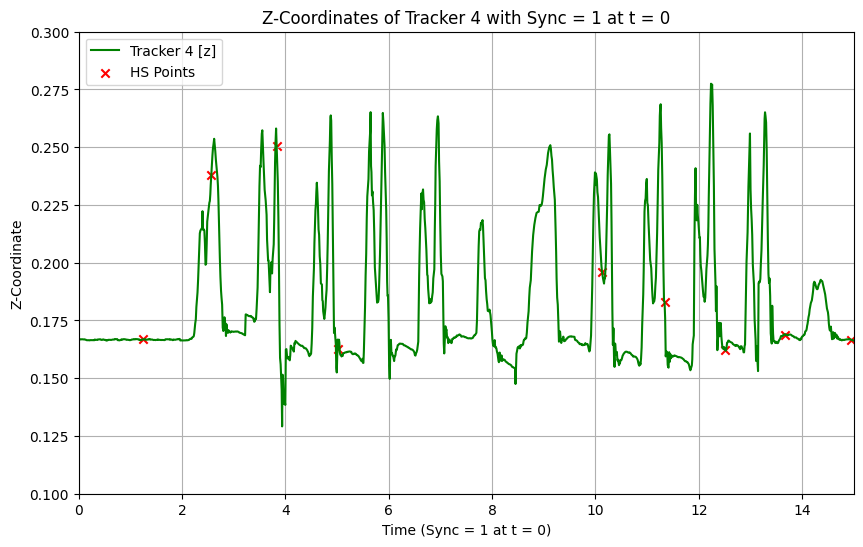

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
vr_data = pd.read_excel('vr info.xlsx')

# Filter data where Sync == 1
filtered_vr_data = vr_data[vr_data['Sync'] == 1].copy()  # Use .copy() to avoid chained indexing warning

# Find the first occurrence of Sync = 1
first_sync_time = filtered_vr_data['T'].min()

# Adjust time (T) relative to the first Sync = 1 occurrence
filtered_vr_data.loc[:, 'T_adjusted'] = filtered_vr_data['T'] - first_sync_time  # Use .loc to set values

# Extract relevant columns
trackers = filtered_vr_data[['T_adjusted', 'Tracker_04 [z]']]  # Extracting Tracker 4

# Plot the data for Tracker 4
plt.figure(figsize=(10, 6))

plt.plot(trackers['T_adjusted'], trackers['Tracker_04 [z]'], label='Tracker 4 [z]', color='g')

# Plot HS points from results_df
for index, row in results_df.iterrows():
    hs_time_synced = row['VR Data Time (Synced, s)']
    z_coordinate = filtered_vr_data.loc[filtered_vr_data['T_adjusted'] == hs_time_synced, 'Tracker_04 [z]'].values
    if len(z_coordinate) > 0:
        plt.scatter(hs_time_synced, z_coordinate, color='r', marker='x', label='HS Points' if index == 0 else "")

plt.xlabel('Time (Sync = 1 at t = 0)')
plt.ylabel('Z-Coordinate')
plt.legend()
plt.title('Z-Coordinates of Tracker 4 with Sync = 1 at t = 0')
plt.grid(True)

# Zoom into the specified time interval
plt.xlim(0, 15)

# Zoom into the specified z interval
plt.ylim(0.1, 0.3)

plt.show()

# Find max and min values
max_value = trackers['Tracker_04 [z]'].max()
min_value = trackers['Tracker_04 [z]'].min()

# Find times corresponding to max and min values
time_at_max = trackers.loc[trackers['Tracker_04 [z]'].idxmax(), 'T_adjusted']
time_at_min = trackers.loc[trackers['Tracker_04 [z]'].idxmin(), 'T_adjusted']

#print(f"Maximum Z-Coordinate value: {max_value} at time {time_at_max}")
#print(f"Minimum Z-Coordinate value: {min_value} at time {time_at_min}")


In [18]:
import pandas as pd

# Load the data
vr_data = pd.read_excel('vr info.xlsx')
mat_data = pd.read_excel('MAT EXAMPLE (1).xlsx', skiprows=20)

# Filter MAT data to relevant columns and only right foot steps
filtered_mat_data = mat_data.iloc[:, :4].copy()
filtered_mat_data.columns = ['Sample #s', 'Left or Right', 'First Contact (HS)', 'Second Contact (TO)']
right_foot_data = filtered_mat_data[filtered_mat_data['Left or Right'].str.contains('Right')]

# Extract relevant columns for VR data
filtered_vr_data = vr_data[['T', 'Sync', 'Tracker_04 [z]']]

# Find the first occurrence of Sync = 1
first_sync_time = filtered_vr_data[filtered_vr_data['Sync'] == 1]['T'].min()

# Function to find the closest future time in VR data
def find_closest_future_time(vr_times, mat_time):
    future_times = vr_times[vr_times >= mat_time]
    return future_times.min() if len(future_times) > 0 else None

# Initialize lists to store results
results_to = []

# Process each right foot TO time
for index, row in right_foot_data.iterrows():
    mat_to_time = row['Second Contact (TO)']
    vr_time_offset = find_closest_future_time(filtered_vr_data['T'], mat_to_time + first_sync_time)
    
    if vr_time_offset:
        vr_time_synced = vr_time_offset - first_sync_time
        accuracy = abs(vr_time_synced - mat_to_time)
        accuracy_percentage = 100 - (accuracy / mat_to_time * 100)
        
        # Fetch the corresponding Z-coordinate value
        z_coordinate = filtered_vr_data.loc[filtered_vr_data['T'] == vr_time_offset, 'Tracker_04 [z]'].values
        z_coordinate_value = z_coordinate[0] if len(z_coordinate) > 0 else None
        
        results_to.append((mat_to_time, vr_time_offset, vr_time_synced, z_coordinate_value, accuracy, accuracy_percentage))

# Convert results to DataFrame for better display
results_to_df = pd.DataFrame(results_to, columns=['TO MAT Data Time (s)', 'VR Data Time (Offset, s)', 'VR Data Time (Synced, s)', 'Z-Coordinate', 'Accuracy (s)', 'Accuracy (%)'])
results_to_df


,TO MAT Data Time (s),"VR Data Time (Offset, s)","VR Data Time (Synced, s)",Z-Coordinate,Accuracy (s),Accuracy (%)
0,2.133,17.768084,2.142829,0.166822,0.009829,99.539196
1,3.392,19.021906,3.396651,0.174430,0.004651,99.862875
2,4.608,20.243408,4.618154,0.230245,0.010154,99.779653
3,5.817,21.444077,5.818822,0.194849,0.001822,99.968680
4,10.925,26.558947,10.933692,0.196259,0.008692,99.920440
5,12.100,27.729624,12.104369,0.185327,0.004369,99.963891
6,13.267,28.899269,13.274014,0.262343,0.007014,99.947128
7,14.483,30.125097,14.499843,0.178563,0.016843,99.883708
8,15.842,31.471434,15.846179,0.171685,0.004179,99.973621
9,18.300,33.927288,18.302033,0.222174,0.002033,99.988888


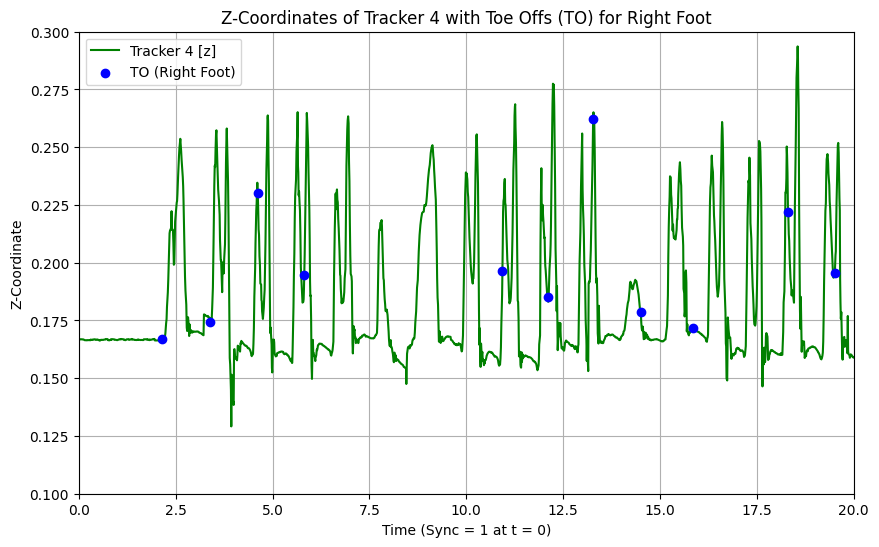

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
vr_data = pd.read_excel('vr info.xlsx')
mat_data = pd.read_excel('MAT EXAMPLE (1).xlsx', skiprows=20)

# Filter MAT data to relevant columns and only right foot steps
filtered_mat_data = mat_data.iloc[:, :4].copy()
filtered_mat_data.columns = ['Sample #s', 'Left or Right', 'First Contact (HS)', 'Second Contact (TO)']
right_foot_data = filtered_mat_data[filtered_mat_data['Left or Right'].str.contains('Right')]

# Extract relevant columns for VR data
filtered_vr_data = vr_data[['T', 'Sync', 'Tracker_04 [z]']]

# Find the first occurrence of Sync = 1
first_sync_time = filtered_vr_data[filtered_vr_data['Sync'] == 1]['T'].min()

# Function to find the closest future time in VR data
def find_closest_future_time(vr_times, mat_time):
    future_times = vr_times[vr_times >= mat_time]
    return future_times.min() if len(future_times) > 0 else None

# Initialize lists to store results
results_to = []

# Process each right foot TO time
for index, row in right_foot_data.iterrows():
    mat_to_time = row['Second Contact (TO)']
    vr_time_offset = find_closest_future_time(filtered_vr_data['T'], mat_to_time + first_sync_time)
    
    if vr_time_offset:
        vr_time_synced = vr_time_offset - first_sync_time
        accuracy = abs(vr_time_synced - mat_to_time)
        accuracy_percentage = 100 - (accuracy / mat_to_time * 100)
        
        # Fetch the corresponding Z-coordinate value
        z_coordinate = filtered_vr_data.loc[filtered_vr_data['T'] == vr_time_offset, 'Tracker_04 [z]'].values
        z_coordinate_value = z_coordinate[0] if len(z_coordinate) > 0 else None
        
        results_to.append((mat_to_time, vr_time_offset, vr_time_synced, z_coordinate_value, accuracy, accuracy_percentage))

# Convert results to DataFrame for better display
results_to_df = pd.DataFrame(results_to, columns=['TO MAT Data Time (s)', 'VR Data Time (Offset, s)', 'VR Data Time (Synced, s)', 'Z-Coordinate', 'Accuracy (s)', 'Accuracy (%)'])

# Plotting the Z-coordinates of Tracker 4 with TO points
# Filter data where Sync == 1
filtered_vr_data_sync = vr_data[vr_data['Sync'] == 1].copy()  # Use .copy() to avoid chained indexing warning

# Find the first occurrence of Sync = 1
first_sync_time = filtered_vr_data_sync['T'].min()

# Adjust time (T) relative to the first Sync = 1 occurrence
filtered_vr_data_sync.loc[:, 'T_adjusted'] = filtered_vr_data_sync['T'] - first_sync_time  # Use .loc to set values

# Extract relevant columns
trackers = filtered_vr_data_sync[['T_adjusted', 'Tracker_04 [z]']]  # Extracting Tracker 4

# Plot the data for Tracker 4
plt.figure(figsize=(10, 6))
plt.plot(trackers['T_adjusted'], trackers['Tracker_04 [z]'], label='Tracker 4 [z]', color='g')

# Plot TO points
plt.scatter(results_to_df['VR Data Time (Synced, s)'], results_to_df['Z-Coordinate'], color='blue', label='TO (Right Foot)', zorder=5)

plt.xlabel('Time (Sync = 1 at t = 0)')
plt.ylabel('Z-Coordinate')
plt.legend()
plt.title('Z-Coordinates of Tracker 4 with Toe Offs (TO) for Right Foot')
plt.grid(True)

# Zoom into the specified time interval
plt.xlim(0, 20)

# Zoom into the specified z interval
plt.ylim(0.1, 0.3)

plt.show()


Same process for other foot (Tracker 5)

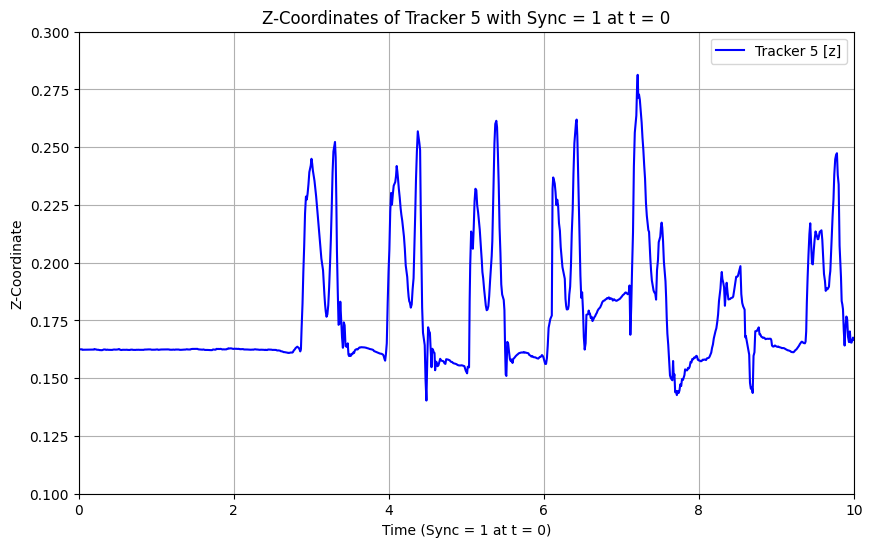

Maximum Z-Coordinate value: 0.782719612 at time 69.77673054
Minimum Z-Coordinate value: -0.469885111 at time 52.77288532


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
vr_data = pd.read_excel('vr info.xlsx')

# Filter data where Sync == 1
filtered_vr_data = vr_data[vr_data['Sync'] == 1].copy()  # Use .copy() to avoid chained indexing warning

# Find the first occurrence of Sync = 1
first_sync_time = filtered_vr_data['T'].min()

# Adjust time (T) relative to the first Sync = 1 occurrence
filtered_vr_data.loc[:, 'T_adjusted'] = filtered_vr_data['T'] - first_sync_time  # Use .loc to set values
#print(first_sync_time)

# Extract relevant columns
trackers = filtered_vr_data[['T_adjusted', 'Tracker_05 [z]']]  # Extracting Tracker 5

# Plot the data for Tracker 5
plt.figure(figsize=(10, 6))

plt.plot(trackers['T_adjusted'], trackers['Tracker_05 [z]'], label='Tracker 5 [z]', color='b')

plt.xlabel('Time (Sync = 1 at t = 0)')
plt.ylabel('Z-Coordinate')
plt.legend()
plt.title('Z-Coordinates of Tracker 5 with Sync = 1 at t = 0')
plt.grid(True)

# Zoom into the specified time interval
plt.xlim(0, 10)

# Zoom into the specified z interval
plt.ylim(0.1, 0.3)

plt.show()

# Find max and min values
max_value = trackers['Tracker_05 [z]'].max()
min_value = trackers['Tracker_05 [z]'].min()

# Find times corresponding to max and min values
time_at_max = trackers.loc[trackers['Tracker_05 [z]'].idxmax(), 'T_adjusted']
time_at_min = trackers.loc[trackers['Tracker_05 [z]'].idxmin(), 'T_adjusted']

print(f"Maximum Z-Coordinate value: {max_value} at time {time_at_max}")
print(f"Minimum Z-Coordinate value: {min_value} at time {time_at_min}")


In [5]:
import pandas as pd

# Load the data
vr_data = pd.read_excel('vr info.xlsx')
mat_data = pd.read_excel('MAT EXAMPLE (1).xlsx', skiprows=20)

# Filter MAT data to relevant columns and only left foot steps
filtered_mat_data = mat_data.iloc[:, :4].copy()
filtered_mat_data.columns = ['Sample #s', 'Left or Right', 'First Contact (HS)', 'Second Contact (TO)']
left_foot_data = filtered_mat_data[filtered_mat_data['Left or Right'].str.contains('Left')]

# Extract relevant columns for VR data
filtered_vr_data = vr_data[['T', 'Sync', 'Tracker_05 [z]']]

# Find the first occurrence of Sync = 1
first_sync_time = filtered_vr_data[filtered_vr_data['Sync'] == 1]['T'].min()

# Function to find the closest future time in VR data
def find_closest_future_time(vr_times, mat_time):
    future_times = vr_times[vr_times >= mat_time]
    return future_times.min() if len(future_times) > 0 else None

# Initialize lists to store results
results = []

# Process each left foot HS time
for index, row in left_foot_data.iterrows():
    mat_hs_time = row['First Contact (HS)']
    vr_time_offset = find_closest_future_time(filtered_vr_data['T'], mat_hs_time + first_sync_time)
    
    if vr_time_offset:
        vr_time_synced = vr_time_offset - first_sync_time
        accuracy = abs(vr_time_synced - mat_hs_time)
        accuracy_percentage = 100 - (accuracy / mat_hs_time * 100)
        
        # Fetch the corresponding Z-coordinate value
        z_coordinate = filtered_vr_data.loc[filtered_vr_data['T'] == vr_time_offset, 'Tracker_05 [z]'].values
        z_coordinate_value = z_coordinate[0] if len(z_coordinate) > 0 else None
        
        results.append((mat_hs_time, vr_time_offset, vr_time_synced, z_coordinate_value, accuracy, accuracy_percentage))

# Convert results to DataFrame for better display
results_df = pd.DataFrame(results, columns=['HS MAT Data Time (s)', 'VR Data Time (Offset, s)', 'VR Data Time (Synced, s)', 'Z-Coordinate', 'Accuracy (s)', 'Accuracy (%)'])
results_df


,HS MAT Data Time (s),"VR Data Time (Offset, s)","VR Data Time (Synced, s)",Z-Coordinate,Accuracy (s),Accuracy (%)
0,1.958,17.590221,1.964967,0.162922,0.006967,99.644189
1,3.225,18.855618,3.230363,0.189330,0.005363,99.833709
2,4.442,20.077324,4.452069,0.167099,0.010069,99.773317
3,5.658,21.289913,5.664659,0.160364,0.006659,99.882316
4,9.467,25.097229,9.471974,0.199280,0.004974,99.947456
5,10.767,26.396894,10.771640,0.257007,0.004640,99.956907
6,11.942,27.574381,11.949126,0.157613,0.007126,99.940326
7,13.108,28.733944,13.108689,0.168640,0.000689,99.994741
8,14.308,29.937275,14.312020,0.166431,0.004020,99.971902
9,18.125,33.759911,18.134656,0.164495,0.009656,99.946726


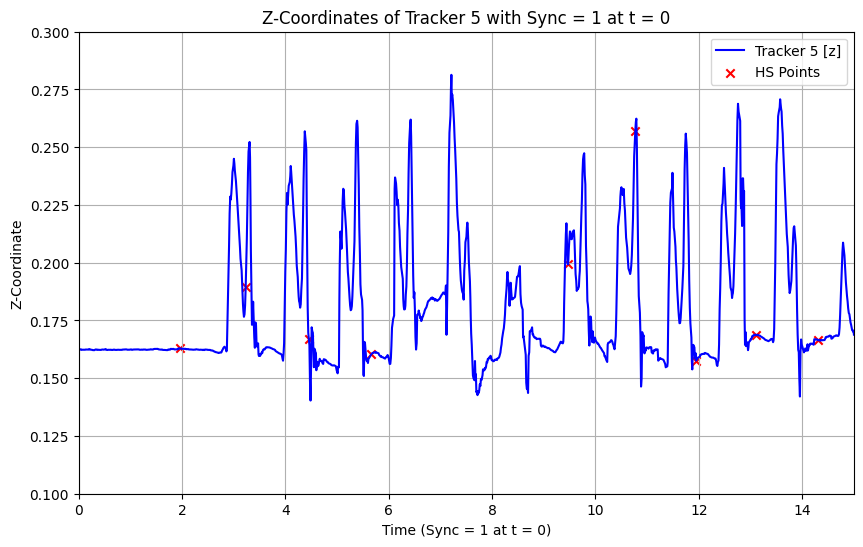

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
vr_data = pd.read_excel('vr info.xlsx')

# Filter data where Sync == 1
filtered_vr_data = vr_data[vr_data['Sync'] == 1].copy()  # Use .copy() to avoid chained indexing warning

# Find the first occurrence of Sync = 1
first_sync_time = filtered_vr_data['T'].min()

# Adjust time (T) relative to the first Sync = 1 occurrence
filtered_vr_data.loc[:, 'T_adjusted'] = filtered_vr_data['T'] - first_sync_time  # Use .loc to set values

# Extract relevant columns
trackers = filtered_vr_data[['T_adjusted', 'Tracker_05 [z]']]  # Extracting Tracker 5

# Plot the data for Tracker 5
plt.figure(figsize=(10, 6))

plt.plot(trackers['T_adjusted'], trackers['Tracker_05 [z]'], label='Tracker 5 [z]', color='b')

# Plot HS points from results_df
for index, row in results_df.iterrows():
    hs_time_synced = row['VR Data Time (Synced, s)']
    z_coordinate = filtered_vr_data.loc[filtered_vr_data['T_adjusted'] == hs_time_synced, 'Tracker_05 [z]'].values
    if len(z_coordinate) > 0:
        plt.scatter(hs_time_synced, z_coordinate, color='r', marker='x', label='HS Points' if index == 0 else "")

plt.xlabel('Time (Sync = 1 at t = 0)')
plt.ylabel('Z-Coordinate')
plt.legend()
plt.title('Z-Coordinates of Tracker 5 with Sync = 1 at t = 0')
plt.grid(True)

# Zoom into the specified time interval
plt.xlim(0, 15)

# Zoom into the specified z interval
plt.ylim(0.1, 0.3)

plt.show()


***BELOW I'M TESTING RIGHT FOOT MAT TIME W/ TRACKER 5 TO SEE IF I COULD'VE MIXED RIGHT W/ LEFT FOOT***

In [11]:
import pandas as pd

# Load the data
vr_data = pd.read_excel('vr info.xlsx')
mat_data = pd.read_excel('MAT EXAMPLE (1).xlsx', skiprows=20)

# Filter MAT data to relevant columns and only right foot steps
filtered_mat_data = mat_data.iloc[:, :4].copy()
filtered_mat_data.columns = ['Sample #s', 'Left or Right', 'First Contact (HS)', 'Second Contact (TO)']
right_foot_data = filtered_mat_data[filtered_mat_data['Left or Right'].str.contains('Right')]

# Extract relevant columns for VR data
filtered_vr_data = vr_data[['T', 'Sync', 'Tracker_05 [z]']]

# Find the first occurrence of Sync = 1
first_sync_time = filtered_vr_data[filtered_vr_data['Sync'] == 1]['T'].min()

# Function to find the closest future time in VR data
def find_closest_future_time(vr_times, mat_time):
    future_times = vr_times[vr_times >= mat_time]
    return future_times.min() if len(future_times) > 0 else None

# Initialize lists to store results
results = []

# Process each right foot HS time
for index, row in right_foot_data.iterrows():
    mat_hs_time = row['First Contact (HS)']
    vr_time_offset = find_closest_future_time(filtered_vr_data['T'], mat_hs_time + first_sync_time)
    
    if vr_time_offset:
        vr_time_synced = vr_time_offset - first_sync_time
        accuracy = abs(vr_time_synced - mat_hs_time)
        accuracy_percentage = 100 - (accuracy / mat_hs_time * 100)
        
        # Fetch the corresponding Z-coordinate value
        z_coordinate = filtered_vr_data.loc[filtered_vr_data['T'] == vr_time_offset, 'Tracker_05 [z]'].values
        z_coordinate_value = z_coordinate[0] if len(z_coordinate) > 0 else None
        
        results.append((mat_hs_time, vr_time_offset, vr_time_synced, z_coordinate_value, accuracy, accuracy_percentage))

# Convert results to DataFrame for better display
results_df = pd.DataFrame(results, columns=['HS MAT Data Time (s)', 'VR Data Time (Offset, s)', 'VR Data Time (Synced, s)', 'Z-Coordinate', 'Accuracy (s)', 'Accuracy (%)'])
results_df


,HS MAT Data Time (s),"VR Data Time (Offset, s)","VR Data Time (Synced, s)",Z-Coordinate,Accuracy (s),Accuracy (%)
0,1.233,16.864185,1.238931,0.162318,0.005931,99.519002
1,2.558,18.189491,2.564237,0.162005,0.006237,99.756191
2,3.825,19.455584,3.830329,0.161471,0.005329,99.860681
3,5.025,20.652100,5.026845,0.154961,0.001845,99.963284
4,10.117,25.751781,10.126527,0.162187,0.009527,99.905833
5,11.333,26.963013,11.337758,0.156839,0.004758,99.958016
6,12.500,28.129475,12.504220,0.231448,0.004220,99.966240
7,13.667,29.295717,13.670463,0.231027,0.003463,99.974664
8,14.942,30.573784,14.948529,0.173106,0.006529,99.956303
9,17.492,33.126076,17.500821,0.159149,0.008821,99.949571


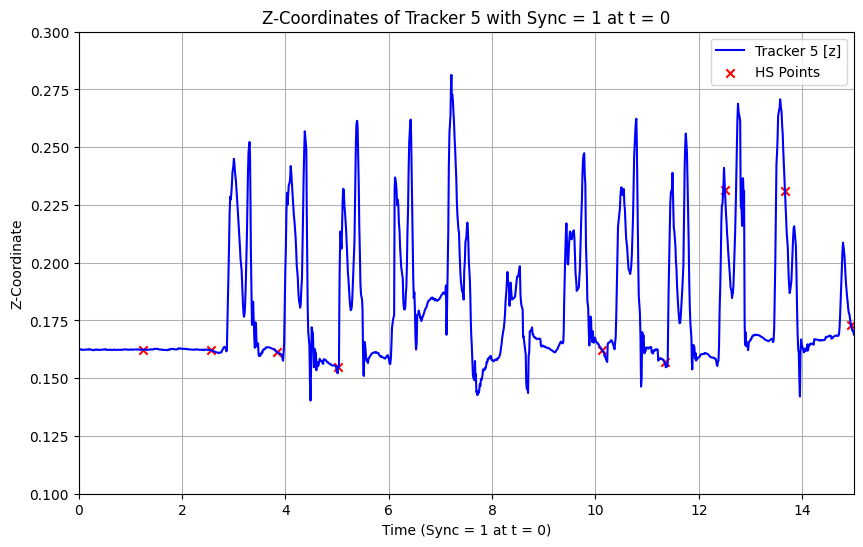

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
vr_data = pd.read_excel('vr info.xlsx')

# Filter data where Sync == 1
filtered_vr_data = vr_data[vr_data['Sync'] == 1].copy()  # Use .copy() to avoid chained indexing warning

# Find the first occurrence of Sync = 1
first_sync_time = filtered_vr_data['T'].min()

# Adjust time (T) relative to the first Sync = 1 occurrence
filtered_vr_data.loc[:, 'T_adjusted'] = filtered_vr_data['T'] - first_sync_time  # Use .loc to set values

# Extract relevant columns
trackers = filtered_vr_data[['T_adjusted', 'Tracker_05 [z]']]  # Extracting Tracker 5

# Plot the data for Tracker 5
plt.figure(figsize=(10, 6))

plt.plot(trackers['T_adjusted'], trackers['Tracker_05 [z]'], label='Tracker 5 [z]', color='b')

# Plot HS points from results_df
for index, row in results_df.iterrows():
    hs_time_synced = row['VR Data Time (Synced, s)']
    z_coordinate = filtered_vr_data.loc[filtered_vr_data['T_adjusted'] == hs_time_synced, 'Tracker_05 [z]'].values
    if len(z_coordinate) > 0:
        plt.scatter(hs_time_synced, z_coordinate, color='r', marker='x', label='HS Points' if index == 0 else "")

plt.xlabel('Time (Sync = 1 at t = 0)')
plt.ylabel('Z-Coordinate')
plt.legend()
plt.title('Z-Coordinates of Tracker 5 with Sync = 1 at t = 0')
plt.grid(True)

# Zoom into the specified time interval
plt.xlim(0, 15)

# Zoom into the specified z interval
plt.ylim(0.1, 0.3)

plt.show()
